In [36]:
%matplotlib inline

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def explained_variance(percentage, images): 
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approx_original = pca.inverse_transform(components)
    return approx_original

In [38]:
mnist = fetch_mldata('MNIST original')
pca = PCA()
pca.fit(mnist.data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [39]:
var_exp = [(i/sum(pca.explained_variance_))*100 for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

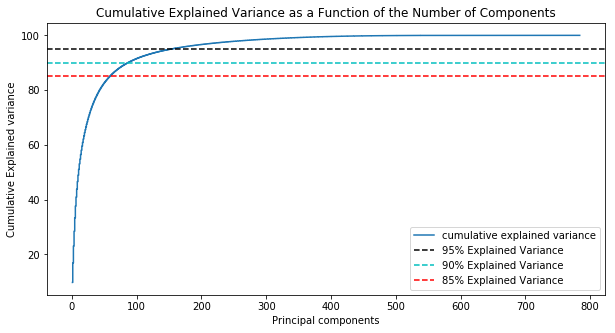

In [46]:
plt.figure(figsize=(10, 5))

plt.step(range(1, 785), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')

plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')

plt.legend()
plt.savefig('E4_cumulative_explained_variance.png')
plt.show()

In [48]:
components_variance = [784, np.argmax(cum_var_exp > 99) + 1, np.argmax(cum_var_exp > 95) + 1, np.argmax(cum_var_exp > 90) + 1, np.argmax(cum_var_exp >= 85) + 1]
components_variance

[784, 331, 154, 87, 59]

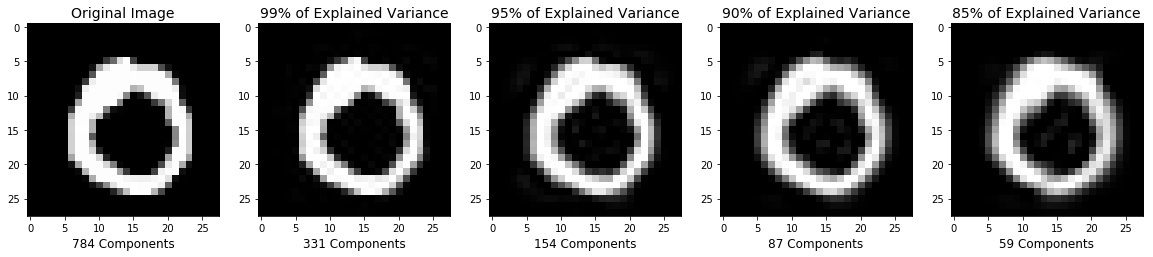

In [43]:
plt.figure(figsize=(20,4));

plt.subplot(1, 5, 1);
plt.imshow(mnist.data[5].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14);

plt.subplot(1, 5, 2);
plt.imshow(explained_variance(.99, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('331 Components', fontsize = 12)
plt.title('99% of Explained Variance', fontsize = 14);

plt.subplot(1, 5, 3);
plt.imshow(explained_variance(.95, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 Components', fontsize = 12)
plt.title('95% of Explained Variance', fontsize = 14);

plt.subplot(1, 5, 4);
plt.imshow(explained_variance(.90, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('87 Components', fontsize = 12)
plt.title('90% of Explained Variance', fontsize = 14);

plt.subplot(1, 5, 5);
plt.imshow(explained_variance(.85, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('59 Components', fontsize = 12)
plt.title('85% of Explained Variance', fontsize = 14);

plt.savefig('E4_component_comparison.png')